# Note!

This was the original "section 4" for my presentation. I've removed it from my workshop because of a large oversight on my part - not all Shads have their name in the Social Security Administration's name database! Even if you've done the "Exploring data" section in the main presentation, you may still find it interesting to go through this version as well. The source data is formatted a bit differently, so the analysis is a bit different.  

If your name is one of the names not in the dataset - I apologize. I looked for name datasets that were more diverse but didn't have much luck.

# 4. Exploring data

***How does Jupyter give you superpowers when working with data?***
1. It's easy to iterate on your previous code/efforts.
2. You can explore *and* present data from the same place *(Jupyter!)*.
3. You can get lots done with just the basics, but when needed, much more depth is available.

<hr />

*This section is based on the DigitalOcean tutorial "Data Analysis and Visualization with Pandas and Jupyter Notebook in Python 3" ([link](https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3))*

There are lots of places on the internet where "raw" data is published for researchers or the general public to analyze (See the appendix section *Data analysis* in the `Jupyter_Notebooks_Workshop.ipynb` file, under the "Links" section). There are many business and academic fields where you can expect to spent significant time loading, cleaning, analyzing, and pondering over data.

Jupyter, along with its many available kernels, is a perfect place to not only analyze data, but to present it. We'll do some basic exploratory data analysis here on the top 1000 baby names from 1880 through to 2022, using data from the [United States Social Security Administration](https://www.ssa.gov/oact/babynames/limits.html).

## 4.1. Back to the Python kernel!

If you were following along with the *Jupyter in math class* section above, then you're probably still running the "SageMath" kernel. Switch back to the "Python 3" kernel for the following data work.

***To switch to the Python kernel...***
1. In the top-right of your notebook, click where it says "SageMath".
2. In the window that opens, select the kernel "Python 3"

Done! Now, as you may know, any cells you execute will be handled by your Python kernel!

## 4.2. The Python data analysis ecosystem

There have been many additions written for Python that layer on functionality to make working with data easier. These additions, called libraries, can make understanding the Python data analysis landscape a little more difficult. The three libraries listed below - Matplotlib, NumPy, and pandas - are extremely common, but aren't necessarily the only game in town.  

### Matplotlib
> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. --*From [website](https://matplotlib.org/)*

Of the three libraries listed here, Matplotlib has the most alternatives available. [Seaborn](https://seaborn.pydata.org/) is one, extending Matplotlib to make more attractive charts that are also interactive. [Plotly](https://plotly.com/python/) is a second, also leaning towards better looking charts and interactivity. Plotly, however, isn't based on Matplotlib.  

SageMath uses Matplotlib behind the scenes to create graphs, and we will use it directly in the section [4.7. Graphing data](#4.7.-Graphing-data).

### NumPy
> NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. --*From [Wikipedia](https://en.wikipedia.org/wiki/NumPy)*

We've used NumPy once in this workshop, and it was in an inconsequential way. I'd suggest not worrying about NumPy until you know you need to use it.

**Links:**
* *[NumPy website](https://numpy.org/)*

### pandas
> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. --*From [website](https://pandas.pydata.org/)*

We use pandas extensively in section 4, and unlike NumPy, I don't think you can go wrong learning as much as you can about pandas, as soon as you can (assuming you'd like to get into data analysis).

**Links:**
* [Python Pandas Tutorial: A Complete Introduction for Beginners](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)
    * A comprehensive tutorial
* Official ["Getting started tutorials"](https://pandas.pydata.org/docs/getting_started/intro_tutorials/)


## 4.3. Loading local data

Your JupyterLab environment should have access to a directory structure that looks, in part, like this (these are the same files you can see when you click the little folder icon on the left):
```
/
    AdditionalNotebooks/
    data/
    Handouts/
    ...
    Jupyter_Notebooks_Workshop.ipynb
    ...
```

Right now, we're interested in the `/data/` directory.

In [ ]:
# (Cell 430)

# The following command (when it's not commented out) will list the
# files in your JupyterLab user's home directory:
# !ls -F ~

# This will list the files in the /data/ directory.
!ls -F ../data/

In [ ]:
# (Cell 431)

# Entries ending in a '/' are directories. Let's look inside 'BabyNames'
!ls -F ../data/BabyNames

For some explanation on what the `!` is doing, see the appendix section *Shell commands via Jupyter* in the appendix of the `Jupyter_Notebooks_Workshop.ipynb` file.  

We see that each file represents one year. Lets take a peek at what the contents of a file looks like:

In [ ]:
# (Cell 432)

# This path might be wrong! FYI for me... or you.
# Using Python's `open()` function, we're reading the first 5 lines of
# the file.
open('../data/BabyNames/yob2004.txt', 'r').readlines()[:5]

We can tell this file - and we'll assume all the others - is a CSV: Comma-separated value. This is a fairly common way to distribute raw data, and we can identify it by the commas as well as by the consistent number of values between each comma in any given line. In our case it looks like there are three columns of data "Name, sex," and probably "Number of babies with this name."

With a feel for how the data is formatted, we'll use the Python library "pandas" to import the data from this file.

In [ ]:
# (Cell 433)

# Import a Python library called "pandas" (Possibly imported previously,
# but we can do it again just to be safe).
import pandas as pd

# Read in one of the files, providing names to each column
names2004 = pd.read_csv('../data/BabyNames/yob2004.txt', names = ['Name', 'Sex', 'NumBabies'])

print("A done deal. We've loaded the file into a Pandas DataFrame.")

***A note about DataFrames***  
Using pandas' `read_csv()` method, we've created a *[DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)* and assigned it to the Python variable `names2004`.  

*From the [pandas user guide](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)* -
> [A] DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet [...].

## 4.4. Getting a feel for your data

Above, we loaded the contents of the CSV file `yob2004.txt` into a pandas DataFrame and assigned it to the variable `names2004`. However, we still don't have a sense for how many names are in this file, how many babies are accounted for in those names, the split between sexes, etc.

So, lets answer some basic questions.

In [ ]:
# (Cell 440)

# How many rows and columns?
names2004.shape

Ah, 32,058 rows with 3 columns.

In [ ]:
# (Cell 441)

# Lets see some example rows; rows from the top:
names2004.head()

In [ ]:
# (Cell 442)
# Rows from the bottom:
names2004.tail()

## 4.5. Filtering data

***The top 10s***  
The *pandas* library provides code that implements the *DataFrame* data type. pandas also includes many methods for working with DataFrames.  

[`nlargest()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html?highlight=nlargest) is one such method. It will:
> Return the first n rows ordered by columns in descending order.

In [ ]:
# (Cell 450)
# Top 10 baby names, male and female:
names2004.nlargest(10, columns=['NumBabies'])

In [ ]:
# (Cell 451)
# Top 10 female baby names:
names2004[names2004['Sex'] == 'F'].nlargest(10, 'NumBabies')

In [ ]:
# (Cell 452)
# Top 10 male baby names
names2004[names2004['Sex'] == 'M'].nlargest(10, 'NumBabies')

***What about your name?***  
*Anywhere I use my name, replace it with your own. Or any other name of interest.*

In [ ]:
# (Cell 453)
# How many babies born in 2004 had your name?
names2004[(names2004['Name'] == 'Chris')]

In [ ]:
# (Cell 454)

# To just see the name for a single sex, add multiple conditions (filters):

# We're capturing the condition inside a variable. This isn't strictly
# necessary, but it can make things easier to read.
single_name_condition = ((names2004['Name'] == 'Chris') & 
                         (names2004['Sex'] == 'M'))

# The condition we created can now be provided to the `names2004` DataFrame
names2004[single_name_condition]

In [ ]:
# (Cell 455)

# But wait! I don't know about you, but I go by two different names:
all_names_condition = (((names2004['Name'] == 'Chris') |
                        (names2004['Name'] == 'Christopher')) &
                       (names2004['Sex'] == 'M')
                      )
names2004[all_names_condition]

Note the increasingly complex conditions being built. Using brackets to ensure correct evaluation, I'm saying "(Chris OR Christopher), AND a sex of 'M'".

There's no (reasonable) limit on the conditions you can give. Feel free to try anything that looks interesting to you.

## 4.6. Combining data

Recall that we have name information from 1880 through to 2022, but so far, we've only loaded data from a single file. To solve this, we're going to create one big DataFrame by concatenating all the CSV files we saw earlier, together.

In [ ]:
# (Cell 460)

# Recall all the files available to us:
!ls ../data/BabyNames/

We can load data from many files into a single DataFrame by first creating one DataFrame for each file, then using the Pandas [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat) function to create one combined DataFrame.

In [ ]:
# (Cell 461)

# A Python list that will hold a DataFrame for each file we load
all_years = []

# We happen to know that files `yobXXXX.txt` exist for each year from
# 1880 to 2022. This `for()` loop will create each of those file names
# for us.
for year in range(1880, 2022+1):
    # The Pandas method `read_csv()` is used to read the contents of a
    # file into a Dataframe, with the result stored in the Python list
    # `all_years`. Each file is located by constructing a file name
    # from the incrementing `year` variable, and the string:
    # "BabyNames/yob{}.txt"
    all_years.append(pd.read_csv('../data/BabyNames/yob{}.txt'.format(year),
                                 names = ['Name', 'Sex', 'NumBabies']))
    
    # This next line is adding a new column to each DataFrame created - 'Year'.
    # -> `all_years[-1]` means "Return the last item put on the list -
    #     in our case, the last DataFrame created.
    # -> `['Year'] = year` is a way we can add a new column to a
    #     DataFrame. In this case, every single row will have the same
    #     value set: whatever value the variable `year` is.
    all_years[-1]['Year'] = year

# Finally, once the `for()` loop has cycled through all the data files,
# we concatenate all the generated DataFrames into one large DataFrame.
all_names = pd.concat(all_years)

After all that hard work, what did we end up with?

In [ ]:
# (Cell 462)

# Check on the shape of our new DataFrame
all_names.shape

In [ ]:
# (Cell 463)

# Get the first five rows:
all_names.head()

We have a new column now, `Year`. We can't see it here, but it makes sense that we now have the same name multiple times, since the same name will exist across multiple years. Let's see:

In [ ]:
# (Cell 464)

# This DataFrame has many entries for the name 'Chris' now.
all_names[all_names['Name'] == 'Chris']

## 4.7. Graphing data

*I want to make a chart that looks like this:*  
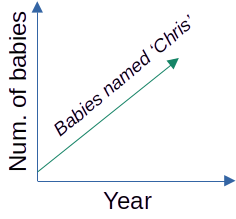

In [ ]:
# (Cell 470)
# Our data currently looks like this
all_names

So from the `all_names` DataFrame, for the name 'Chris', we need to pull out the list of years for the chart's x-axis, and the corresponding number of babies for the y-axis. The [DigitalOcean tutorial](https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3#visualize-data) that I've based this workshop off of achieves this by using DataFrame indexes. However, I'm going to suggest we first do it using data grouping techniques we've previously worked with.  

***Plotting crudely-collected data (not grouping by index)***

In [ ]:
# (Cell 471)

# What you want to graph
target_name = 'Chris'
target_sex = 'M'

# Get the data

# This retrieves the 'Year' column (accomplished by using `['Year']`)
# of the `all_names` DataFrame, where 'Name' == target_name
# and 'Sex' == target_sex
all_years = all_names[(all_names['Name'] == target_name) & 
                      (all_names['Sex'] == target_sex)]['Year']

all_the_babies = all_names[(all_names['Name'] == target_name) &
                             (all_names['Sex'] == target_sex)]['NumBabies']

print("Here's a sample of what the data in `all_years` looks like:")
print(all_years)

The next cell will cause any later plot we create to be saved in the notebook. This means if you open this notebook later you won't have to run the code before you can see the plot. *See:* [StackOverflow](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline#43028034)

In [ ]:
%matplotlib inline

In [ ]:
# (Cell 472)

# Lets plot this data!
# Matplotlib is a Python library for creating plots
import matplotlib.pyplot as pp

# Plot `all_years` on the x-axis, `all_chris_babies` on the y-axis.
pp.plot(all_years, all_the_babies)

***Plotting data based on DataFrame indexes***

A DataFrame index allows for quick access into a specific DataFrame location. That index, somewhat unintuitively, doesn't have to be unique, which we'll see in a minute.  

How are the rows in the `all_names` DataFrame indexed?

In [ ]:
# (Cell 473)
all_names.index

The rows of `all_names` appear to be indexed by number. What are the rows at index '0'?

In [ ]:
# (Cell 474)
all_names.loc[0]

This isn't very helpful to us. Let's make a new "MultiIndex", based on the collective values 'Sex', 'Name', and 'Year':

In [ ]:
# (Cell 475)

# -> `all_names.set_index(['Sex','Name','Year'])` is creating a new index
#    for the `all_names` DataFrame, based on 'Sex', 'Name', then 'Year'.
# -> `sort_index()` then sorts the DataFrame rows based on the newly-
#    created index. This isn't strictly necessary, but it does speed up
#    data access.
# -> Everything to the right of '=' doesn't actually change the
#    `all_names` DataFrame - it makes a new one. Rather than have a
#    second DataFrame around (with the new index), we just overwrite the
#    old one.
all_names = all_names.set_index(['Sex','Name','Year']).sort_index()

print(all_names)

The `all_names` DataFrame is looking a little different now. Indexing by the combined ('Sex', 'Name', Year') value of each row has served to group our data. It also means that retrieving data for graph creation has gotten easier.

In [ ]:
# (Cell 476)

# Easier retrieval of rows, as long as you want to retrieve by sex first,
# then name next, then possibly year.
print("Female Chris' over time:\n", all_names.loc[('F', 'Chris')])
print("\nMale Chris' from 2020:\n", all_names.loc[('M', 'Chris', 2020)])

In [ ]:
# (Cell 477)

# A simple function to make plotting the popularity of a name over time
# as easy as providing a sex and a name.
def name_plot(sex, name):
    data = all_names.loc[sex, name]
    
    pp.plot(data.index, data.values)
    
print("Function `name_plot()` defined.")

In [ ]:
# (Cell 478)

# Using our new function
name_plot('M', 'Christopher')

In [ ]:
# (Cell 479)

# We can plot multiple names on the same chart thanks for how Matplotlib's
# "Pyplot" functionality works. You can call `pp.plot()` multiple times,
# causing plots to be built "on top" of one another.

# Make our chart bigger
pp.figure(figsize = (18, 8))

# Names and gender to search. Change, add, or remove as you desire, but
# be careful to have lines end with a comma!
names = {
#   Name:Sex
    'Hannah':'F',
    'Christopher':'M',
    'Bailey':'F'
}

# This loop will call the function `name_plot` for each Name:Sex pair
# you set, above.
for name, sex in names.items():
    name_plot(sex, name)

# Puts a legend on the plot
pp.legend(names)

***Bonus question!***  
Were the same number of babies born every year? Probably not. When we're graphing over time, consider how this might make our graphs of name popularity misleading. To investigate this you could try answering these questions:
1. How has the rate of births changed year-to-year?
2. Can we chart a name's *relative* popularity? We've charted absolute numbers, but maybe a name is more popular than we realize *relative to the number of babies born in a year.*
3. What about name "concentration?" Of the total babies born in a year, how evenly spread are they across all names?

## 4.8. Learn more about analyzing data in Jupyter

See the appendix section *Data analysis* in the `Jupyter_Notebooks_Workshop.ipynb` file, under the "Links" section.